# Deposition modelling with rate equations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special

## Translational and rotational transport
We assume that molecules are deposited with a rate $\Omega$, in Angstrom/sec. The molecules land on the top of the film and are first *mobile*. The mobile molecules are immobilized when their density $n$ in the film is becoming too high. This can be modelled by assuming that the immobilization rate is proportional to the density of mobile molecules, $\omega_{\rm mobile \rightarrow immobile} = \kappa n$. 
The rate equation for the number densities of mobile, $n$ and immobile, $n_b$ molecules then read
$$
\frac{\partial n}{ \partial t} = \Omega - kn^2 \\
\frac{\partial n_b}{ \partial t} = kn^2
$$
And the solution is
$$
n = \sqrt{ \frac{\Omega}{\kappa} } \tanh⁡(\sqrt{\Omega \kappa} t) \qquad
n_b = \Omega t - n
$$
As expected, the density of mobile molecules saturates at large times, and the film thickness grows lineraly with time.

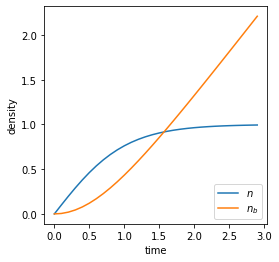

In [2]:
plt.rcParams['figure.figsize'] = [4, 4]

Omega = 1
kappa = 1

def n(t):
    return np.sqrt(Omega/kappa)*np.tanh( np.sqrt(kappa*Omega)*t)

def n_b(t):
    return Omega*np.log( np.cosh( np.sqrt(Omega*kappa)*t) )

time = np.arange(0,3,0.1)
plt.plot(time, n(time), label='$n$')
plt.plot(time, n_b(time), label='$n_b$')
plt.xlabel('time')
plt.ylabel('density')
plt.legend(loc='lower right')
plt.show()

# Orientational distribution functions

To account for the molecular reorientation in the film we split the population of molecules in the mobile layer on upright standing and flat lying, $n = n_u  + n_f$. The orientational distribution of these molecules assumes that the surface provides an external potential that favours molecules to lye flat 
$$
\Phi_f (\theta) = \frac{1}{Z_f} \exp{ \alpha_f \frac{\cos^2 \theta}{k_BT} }
$$
Similarly, the upright standing molecules have similar distribution function but centered around $\theta = \pi/2$
$$
\Phi_u (\theta) = \frac{1}{Z_u} \exp{ \alpha_u \frac{\sin^2 \theta}{k_BT} }
$$
The normalization factor and the order parameter in both cases read
$$
Z = \int_0^\pi \Phi(\theta) \sin \theta d \theta \\
S=\int_0^\pi {\left( 1-\frac{3}{2}  \sin^2\theta \right)} \Phi(\theta) \sin \theta d \theta
$$

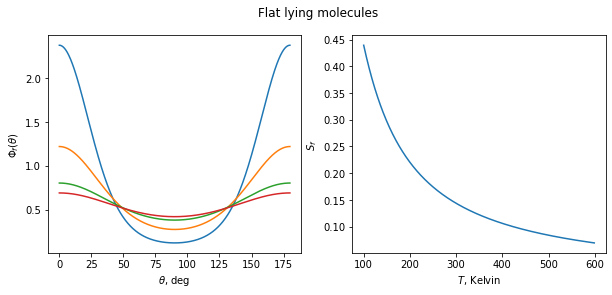

In [32]:
plt.rcParams['figure.figsize'] = [10, 4]

step = 0.001
theta = np.arange(0,np.pi,step)

stepT = 1
rangeT = np.arange(100,600,stepT)

def Phi_f(alpha, theta, T):
    hist = np.exp( alpha*(np.cos(theta)**2)/T )
    whist = np.exp( alpha*(np.cos(theta)**2)/T )*np.sin(theta)
    norm = np.sum(whist)*step
    a = np.sqrt(alpha/T)
    norm_analyic  = 2* np.exp(a**2) * special.dawsn( a )/a
    #print(norm, norm_analyic)
    return hist/norm

def order_f(alpha, T):
    return np.sum( (1-3./2.*np.sin(theta)**2) *Phi_f(alpha,theta,T)*np.sin(theta) ) * step

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Flat lying molecules')

alpha = 300 # this is alpha / k_B
ax1.plot(theta*180/np.pi, Phi_f(alpha, theta,100))
ax1.plot(theta*180/np.pi, Phi_f(alpha, theta,200))
ax1.plot(theta*180/np.pi, Phi_f(alpha, theta,400))
ax1.plot(theta*180/np.pi, Phi_f(alpha, theta,600))
ax1.set_xlabel('$\\theta$, deg')
ax1.set_ylabel('$\Phi_f( \\theta )$')

o_f = [order_f(alpha, T) for T in rangeT ]
ax2.plot(rangeT, o_f )
ax2.set_ylabel('$S_f$')
ax2.set_xlabel('$T$, Kelvin')

plt.show()


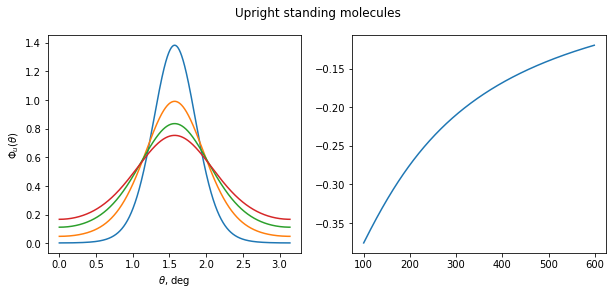

In [33]:
def Phi_u(alpha, theta, T):
    hist = np.exp( alpha*(np.sin(theta)**2)/T )
    whist = np.exp( alpha*(np.sin(theta)**2)/T )*np.sin(theta)
    norm = np.sum(whist)*step
    a = np.sqrt(alpha/T)
    norm_analyic  = np.exp(a**2) *np.sqrt(np.pi) * special.erf( a )/a
    #print(norm, norm_analyic)
    return hist/norm

def order_u(alpha,T):
    return np.sum( (1-3./2.*np.sin(theta)**2) *Phi_u(alpha,theta,T)*np.sin(theta) ) * step

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Upright standing molecules')

alpha = 600
ax1.plot(theta, Phi_u(alpha, theta,100))
ax1.plot(theta, Phi_u(alpha, theta,200))
ax1.plot(theta, Phi_u(alpha, theta,300))
ax1.plot(theta, Phi_u(alpha, theta,400))
ax1.set_xlabel('$\\theta$, deg')
ax1.set_ylabel('$\Phi_u( \\theta )$')

o_u = [order_u(alpha,T) for T in rangeT ]
ax2.plot(rangeT, o_u )

plt.show()


## Reorientation dynamics
The final set of rate equations that takes into account rotational diffusion between standing upright and lying flat molecules takes the form
$$
\frac{\partial n_f}{ \partial t} = \Omega - kn n_f - \omega_{f \rightarrow u} n_f \\
\frac{\partial n_u}{ \partial t} = - kn n_u + \omega_{f \rightarrow u} n_f \\
\frac{\partial n_f^b}{ \partial t} = kn n_f \\
\frac{\partial n_u^b}{ \partial t} = kn n_u
$$
and the overall distribution function in the film
$$
\Phi(\theta) = \frac{n_f^b \Phi_f(\theta) + n_u^b \Phi_u(\theta)}{ n_f^b + n_u^b }
$$

Within this model it is clear that we have several possibilities:

- Deposition rate is much higher than the rotational diffusion. All molecules are frozen in the "flat" orientation.

- Deposition rate is comparable to the rotational diffusion. A part of molecules is standing upright

- Temperature increase promotes rotational diffusion. To get more molecules to stand upright we can decrease the deposition rate or increase temperature. 

- At large temperatures we get very broad orientational distributions and amorphous films.

The stationary solution to the last equation can be written as

$$
\Phi = \frac{1}{1+\eta } \left[ \Phi_f(\theta) + \eta \Phi_u(\theta) \right]
$$
where $\eta = l^* \omega_{f \rightarrow u} / \Omega  =  \tau_d / \tau_r$, where $l^*$ is the thickness of the  layer with mobile molecules, $\tau_d$ is the time required to deposite one mobile layer (or to make it immobile), $\tau_r$ is the typical rotational diffusion time. 

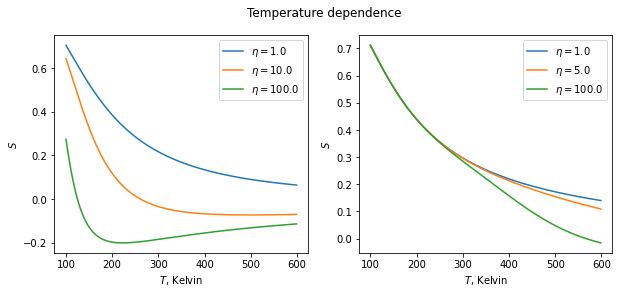

In [53]:
plt.rcParams['figure.figsize'] = [10, 4]
omrot = 1.0

def omega(T, eta, A):
    return eta*np.exp(-A/T)

def order(T, eta, A):
    return np.add(order_f(alpha,T), np.multiply(order_u(alpha,T),omega(T, eta, A)) )/(1+omega(T, eta, A))

rangeT = np.arange(100,600,1)
A = 500
o1 = [order(T, 1., A) for T in rangeT ]
o2 = [order(T, 10.0, A) for T in rangeT ]
o3 = [order(T, 100.0, A) for T in rangeT ]

A = 2500
o4 = [order(T, 1., A) for T in rangeT ]
o5 = [order(T, 10.0, A) for T in rangeT ]
o6 = [order(T, 100.0, A) for T in rangeT ]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Temperature dependence')

ax1.plot(rangeT, o1, label='$\eta=1.0$' )
ax1.plot(rangeT, o2, label='$\eta=10.0$' )
ax1.plot(rangeT, o3, label='$\eta=100.0$' )
ax1.legend(loc='upper right')
ax1.set_xlabel('$T$, Kelvin')
ax1.set_ylabel('$S$')

ax2.plot(rangeT, o4, label='$\eta=1.0$' )
ax2.plot(rangeT, o5, label='$\eta=5.0$' )
ax2.plot(rangeT, o6, label='$\eta=100.0$' )
ax2.legend(loc='upper right')
ax2.set_xlabel('$T$, Kelvin')
ax2.set_ylabel('$S$')

plt.show()

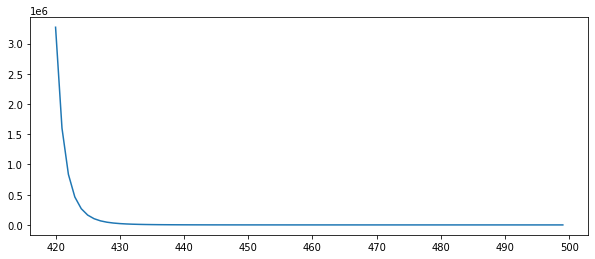

In [62]:
stepT = 1
rangeT = np.arange(420,500,stepT)
plt.plot(rangeT, np.exp(300/(rangeT-400)))